### Introduction
* Matrix Inverse Method
* TensorFlow Way of Regression
* Lasso & Ridge Regression
* Elastic Net Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
sess = tf.Session()
x_vals = np.linspace(0, 10, 100)

In [3]:
y_vals = x_vals + np.random.normal(0, 1, 100)

In [9]:
x_vals_column = x_vals[:,np.newaxis]

In [11]:
ones_column  = np.repeat(1, 100)[:,np.newaxis]

In [15]:
A = np.column_stack((x_vals_column, ones_column))

In [16]:
b = y_vals[:,np.newaxis]

In [18]:
A_tensor = tf.constant(A)

In [19]:
b_tensor = tf.constant(b)

<img src="https://www.safaribooksonline.com/library/view/tensorflow-machine-learning/9781786462169/graphics/B05480_03_13.jpg">

In [21]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)

In [22]:
tA_A_inv = tf.matrix_inverse(tA_A)

In [23]:
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))

In [24]:
solution = tf.matmul(product,b_tensor)

In [26]:
solution_eval = sess.run(solution)

In [27]:
slope = solution_eval[0][0]

In [28]:
solution_eval[0][0]

1.02567165419803

In [29]:
y_intercept = solution_eval[1][0]

In [31]:
bf = []
for i in x_vals:
    bf.append(slope*i + y_intercept)

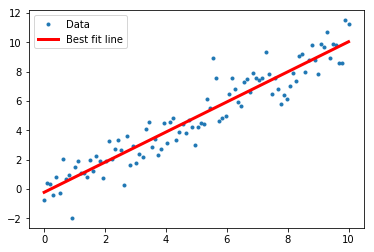

In [34]:
plt.plot(x_vals, y_vals, '.', label='Data')
plt.plot(x_vals, bf, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

### The TensorFlow Way of Linear Regression

In [60]:
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()
iris = datasets.load_iris()

In [74]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [75]:
#declare our learning rate, batch size, placeholders, and model variables
learning_rate = 0.05
batch_size = 25

In [76]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [77]:
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [78]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [79]:
loss = tf.reduce_mean(tf.square(y_target - model_output))
init = tf.global_variables_initializer()

In [80]:
sess.run(init)

In [81]:
my_opt = tf.train.GradientDescentOptimizer(learning_rate)

In [82]:
train_step = my_opt.minimize(loss)

In [83]:
loss_data = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    #training_data
    rand_x = np.transpose([x_vals[rand_index]])
    #testing data
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step,feed_dict={y_target:rand_y, x_data:rand_x})
    temp_loss = sess.run(loss, feed_dict={y_target:rand_y, x_data:rand_x})
    loss_data.append(temp_loss)
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #5 A = [[ 1.61624086]] b = [[ 1.94284403]]
Loss = 4.04724
Step #10 A = [[ 2.08684254]] b = [[ 2.60181046]]
Loss = 1.36487
Step #15 A = [[ 2.06445456]] b = [[ 2.90200281]]
Loss = 1.75925
Step #20 A = [[ 2.00173998]] b = [[ 3.1431756]]
Loss = 0.967055
Step #25 A = [[ 1.82255936]] b = [[ 3.27744889]]
Loss = 0.86082
Step #30 A = [[ 1.74178493]] b = [[ 3.45913339]]
Loss = 1.15743
Step #35 A = [[ 1.66903043]] b = [[ 3.62547874]]
Loss = 0.818275
Step #40 A = [[ 1.56762207]] b = [[ 3.71085262]]
Loss = 0.533951
Step #45 A = [[ 1.5295589]] b = [[ 3.84056449]]
Loss = 0.478626
Step #50 A = [[ 1.4425621]] b = [[ 3.93438411]]
Loss = 0.444537
Step #55 A = [[ 1.40663624]] b = [[ 4.03984404]]
Loss = 0.227177
Step #60 A = [[ 1.34098148]] b = [[ 4.10250998]]
Loss = 0.366792
Step #65 A = [[ 1.27528739]] b = [[ 4.13140821]]
Loss = 0.300285
Step #70 A = [[ 1.21289301]] b = [[ 4.21631575]]
Loss = 0.448382
Step #75 A = [[ 1.24151397]] b = [[ 4.29712486]]
Loss = 0.239997
Step #80 A = [[ 1.19705391]] b = [

Step #640 A = [[ 0.88413119]] b = [[ 4.77165985]]
Loss = 0.269394
Step #645 A = [[ 0.88604152]] b = [[ 4.77089739]]
Loss = 0.203524
Step #650 A = [[ 0.87255031]] b = [[ 4.77266502]]
Loss = 0.196257
Step #655 A = [[ 0.89517814]] b = [[ 4.78373003]]
Loss = 0.233273
Step #660 A = [[ 0.88945723]] b = [[ 4.77512074]]
Loss = 0.420215
Step #665 A = [[ 0.86291039]] b = [[ 4.75783253]]
Loss = 0.253194
Step #670 A = [[ 0.89540631]] b = [[ 4.77301455]]
Loss = 0.26335
Step #675 A = [[ 0.89473259]] b = [[ 4.76264191]]
Loss = 0.297808
Step #680 A = [[ 0.8876937]] b = [[ 4.75862598]]
Loss = 0.211307
Step #685 A = [[ 0.91586423]] b = [[ 4.78459549]]
Loss = 0.212823
Step #690 A = [[ 0.883008]] b = [[ 4.76325941]]
Loss = 0.205894
Step #695 A = [[ 0.88917279]] b = [[ 4.76691294]]
Loss = 0.180569
Step #700 A = [[ 0.89519686]] b = [[ 4.76523018]]
Loss = 0.268219
Step #705 A = [[ 0.90380299]] b = [[ 4.76607943]]
Loss = 0.161249
Step #710 A = [[ 0.88272744]] b = [[ 4.75579929]]
Loss = 0.168926
Step #715 A = 

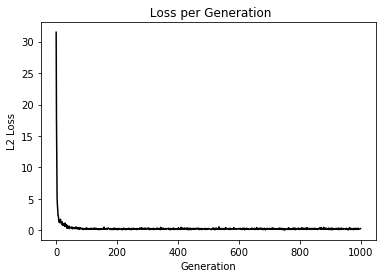

In [84]:
plt.plot(loss_data, 'k-')
plt.title(' Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()